<style>
.rendered_html * + p, .rendered_html p {
    text-align:justify;
}
.print {
    display:none;
}
@media print {
 a[href]:after {
     content: ""
 }
 .noprint {
  display:none
  }
  .print {
        display:block;
    }
}
</style>
<head>
    <base target="_blank">
</head>
<center>
<img src="../../../images/logo2.png" width="200px">
</center>
<br>

# <center>Introduction to OpenCV</center>
<hr style="height:2px;border-width:0;color:black;background-color:black">


# Drawing

OpenCV provides convenient, easy-to-use methods to draw shapes on an image. In this lecture, we’ll review the three most basic methods to draw shapes: 

* cv2.line()
* cv2.rectangle()
* cv2.circle()

While the following code is by no means a complete, exhaustive overview of the drawing capabilities of OpenCV, it will nonetheless provide a quick, hands-on approach to get you started drawing immediately.

In [2]:
# Import the necessary packages
import numpy as np
import cv2

Initialize our canvas as a 300x300 with 3 channels, Red, Green, and Blue, with a black background

In [2]:
canvas = np.zeros((300, 300, 3), dtype = "uint8")

Draw a green line from the top-left corner of our canvas to the bottom-right.

In [3]:
green = (0, 255, 0) # in OpenCV, a color is represented with a 3x1 BGR tuple
cv2.line(canvas, (0, 0), (300, 300), green)
cv2.imshow("Canvas", canvas)
cv2.waitKey()
cv2.destroyAllWindows()

To show images, the matplotlib alternative is more convenient.

In [4]:
from matplotlib import pyplot as plt

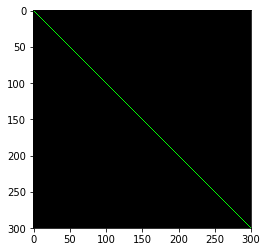

In [5]:
plt.imshow(canvas[...,::-1])
plt.show()

Now, draw a 3 pixel thick red line from the top-right corner to the bottom-left.

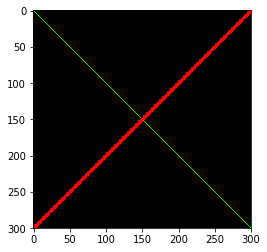

In [6]:
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)

plt.imshow(canvas[...,::-1])
plt.show()

Draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60

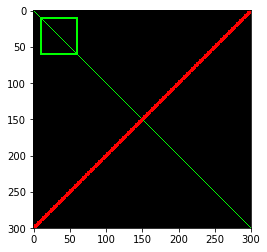

In [10]:
cv2.rectangle(canvas, (10, 10), (60, 60), green,2)

plt.imshow(canvas[...,::-1])
plt.show()

Draw another rectangle, this time we'll make it red and 5 pixels thick

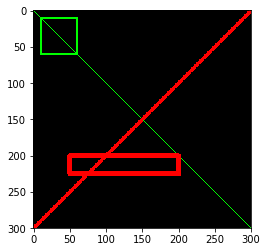

In [12]:
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)

plt.imshow(canvas[...,::-1])
plt.show()

Let's draw one last rectangle: blue and filled in

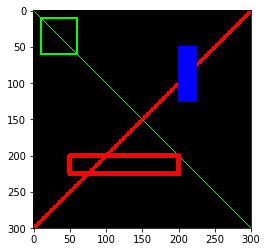

In [14]:
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt.imshow(canvas[...,::-1])
plt.show()

Reset our canvas and draw a white circle at the center of the canvas with increasing radii - from 25 pixels to 150 pixels

In [15]:
canvas = np.zeros((300, 300, 3), dtype = "uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY), r, white)

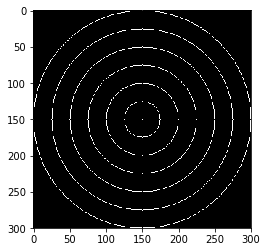

In [16]:
plt.imshow(canvas[...,::-1])
plt.show()

Draw 25 random circles

In [21]:
for i in range(0, 25):
    # randomly generate a radius size between 5 and 200,
    # generate a random color, and then pick a random
    # point on our canvas where the circle will be drawn
    radius = np.random.randint(5, high = 200)
    color = np.random.randint(0, high = 256, size = (3,)).tolist()
    pt = np.random.randint(0, high = 300, size = (2,))

    # draw our random circle
    cv2.circle(canvas, tuple(pt), radius, color, -1)

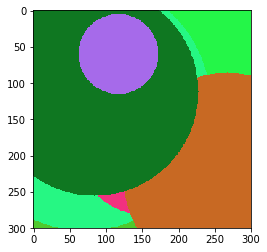

In [22]:
plt.imshow(canvas[...,::-1])
plt.show()

## Challenge
Your goal is to reproduce the following 300x300 image using as little code as possible:

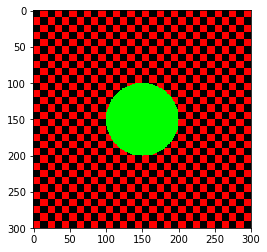

each red/black square is a 10x10 pixel block, the radius of the green circle is 50 pixels.

My solution is able to draw the above image in 13 lines of code. Can you do better?

<b>Hint:</b> specific usage of the function range() may help to optimize the code.

# <font style="color:black">Getting Started with Images</font>

##  <font style="color:black">Import Libraries</font>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

##  <font style="color:black">Display Image Directly</font>
We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [3]:
# Display 18x18 pixel image.
Image(filename='checkerboard_18x18.png') 

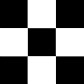

In [4]:
# Display 84x84 pixel image.
Image(filename='checkerboard_84x84.jpg') 


# <font style="color:black">Reading images using OpenCV</font>

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>
``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

**`Imread:`**https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56

**`ImreadModes:`** https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80


In [5]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## Display Image attributes

In [6]:
# print the size  of image
print("Image size is ", cb_img.shape)

# print data-type of image
print("Data type of image is ", cb_img.dtype)

Image size is  (18, 18)
Data type of image is  uint8


## Display Images using Matplotlib

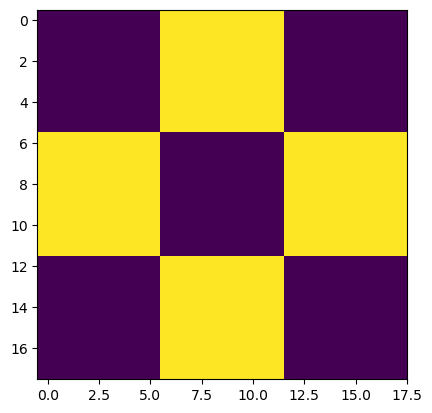

In [7]:
# Display image.
plt.imshow(cb_img)

### What happened?
Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.

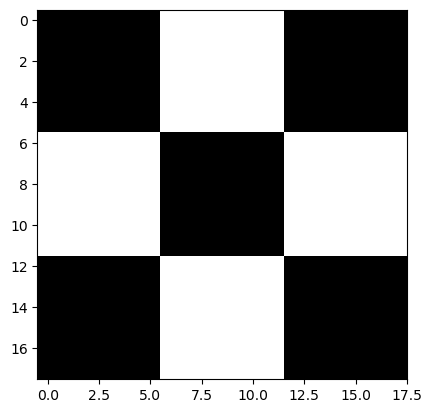

In [8]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')

## Another example

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

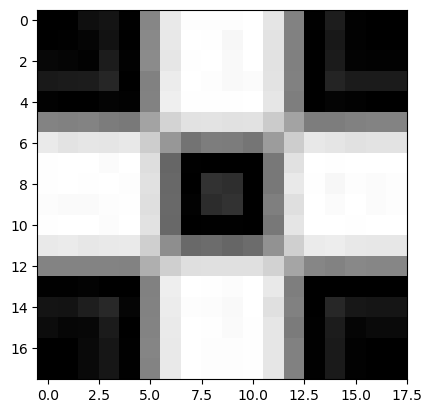

In [9]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg",0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy,cmap='gray')

## Working with Color Images
Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

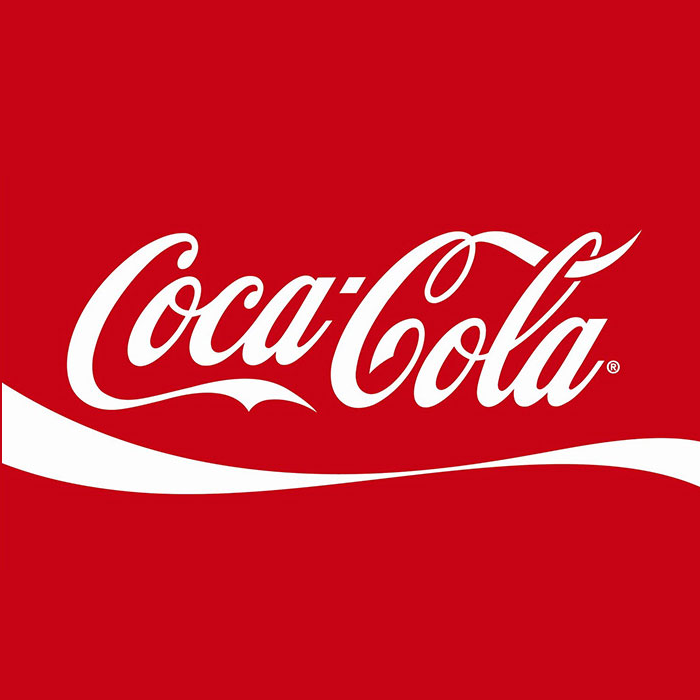

In [10]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png")

## Read and display color image
Let us read a color image and check the parameters. Note the image dimension.

In [11]:
# Read in image
coke_img = cv2.imread("coca-cola-logo.png",1)

# print the size  of image
print("Image size is ", coke_img.shape)

# print data-type of image
print("Data type of image is ", coke_img.dtype)

print("")

Image size is  (700, 700, 3)
Data type of image is  uint8



## Display the Image

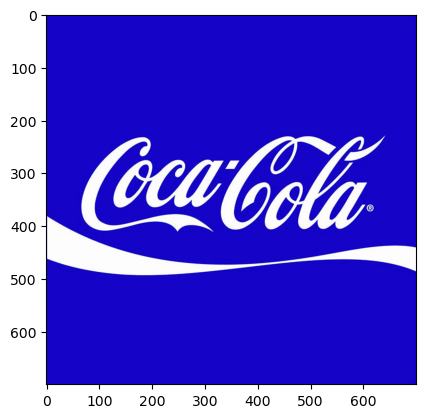

In [12]:
plt.imshow(coke_img)
#  What happened?

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

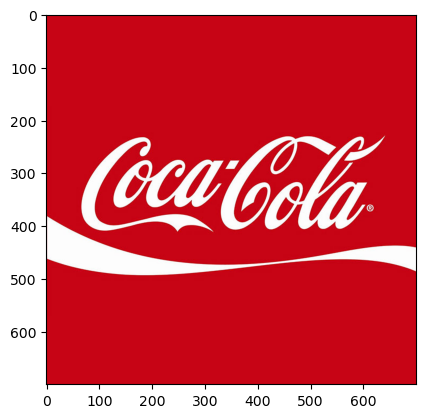

In [13]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

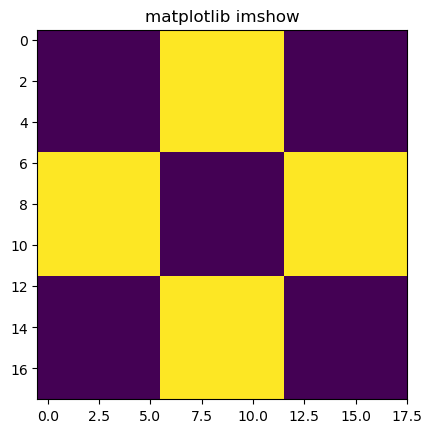

In [14]:
# Use matplotlib imshow()
plt.imshow(cb_img)
plt.title("matplotlib imshow")
plt.show()

In [15]:
# Use OpenCV imshow(), display for 8 sec
window1 = cv2.namedWindow("w1")
cv2.imshow(window1, cb_img)
cv2.waitKey(8000)
cv2.destroyWindow(window1)

In [17]:
# Use OpenCV imshow(), display for 8 sec
window2 = cv2.namedWindow("w2")
cv2.imshow(window2, coke_img)
cv2.waitKey(8000)
cv2.destroyWindow(window2)

In [18]:
# Use OpenCV imshow(), display until any key is pressed
window3 = cv2.namedWindow("w3")
cv2.imshow(window3, cb_img)
cv2.waitKey(0)
cv2.destroyWindow(window3)

In [19]:
window4 = cv2.namedWindow("w4")

Alive = True
while Alive:
    # Use OpenCV imshow(), display until 'q' key is pressed
    cv2.imshow(window4, coke_img)
    keypress = cv2.waitKey(1)
    if keypress == ord('q'):
        Alive = False
cv2.destroyWindow(window4)

cv2.destroyAllWindows()

## Splitting and Merging Color Channels


**`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

**`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a


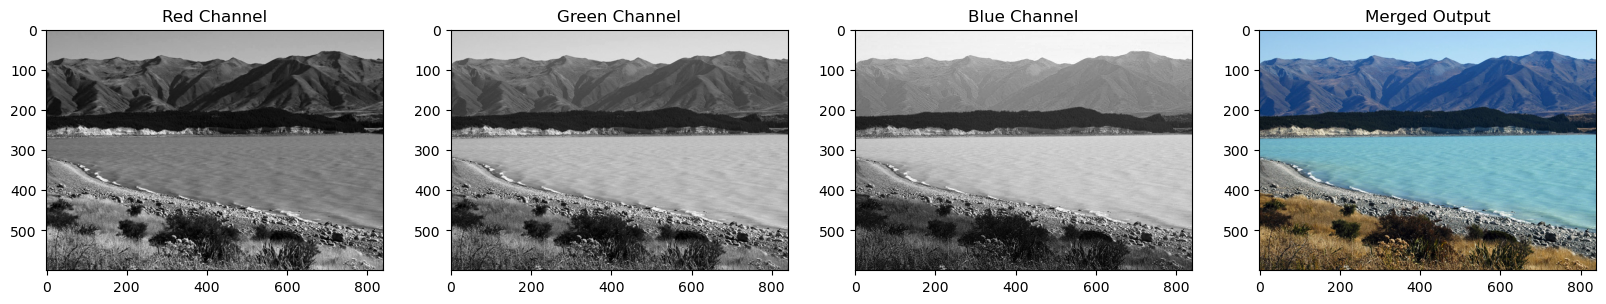

In [19]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# Show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
2. `code` color space conversion code (see ColorConversionCodes). 

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`cv2.cvtColor:`** https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab
**`ColorConversionCodes:`** https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0

### Changing from BGR to RGB

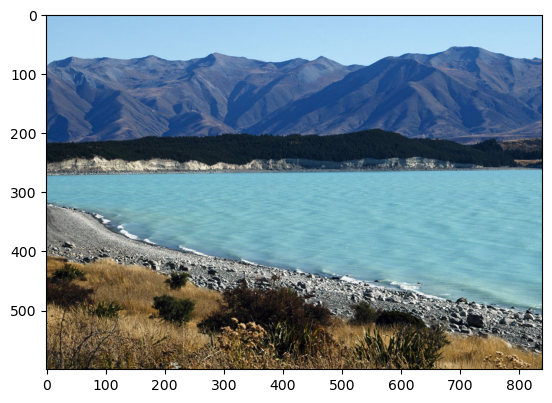

In [20]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV color space

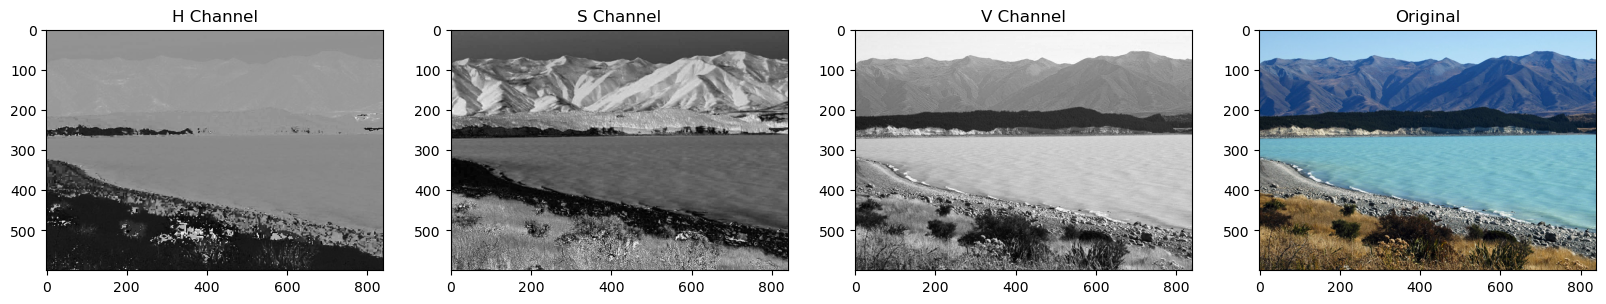

In [21]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)
# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");


## Modifying individual Channel

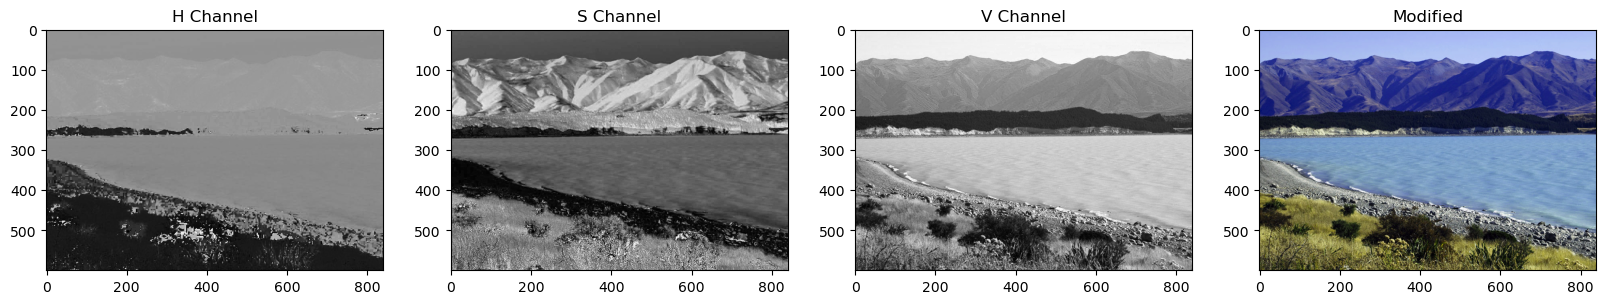

In [22]:
h_new = h+10
img_NZ_merged = cv2.merge((h_new,s,v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Modified");

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

	
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path. 
2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`Imwrite:`** https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce
**`ImwriteFlags:`**https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac

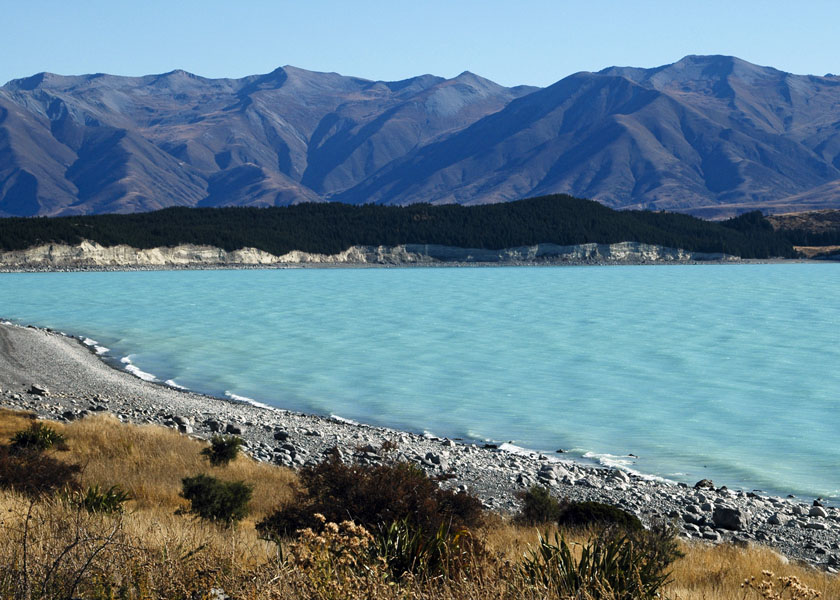

In [23]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png') 

In [18]:
# read the image as Color
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape is: ", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape is: ", img_NZ_gry.shape)

img_NZ_bgr shape is:  (600, 840, 3)
img_NZ_gry shape is:  (600, 840)


# Image Processing

First, we’ll start off with basic image transformations, such as translation, rotation, resizing, flipping, and cropping. Then, we’ll explore how to split an image into its respective channels and compute the image histograms.

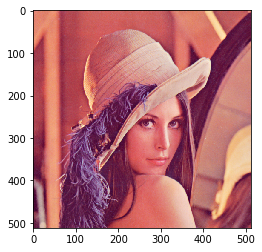

In [41]:
image = cv2.imread('lena.png')
plt.imshow(image[...,::-1])
plt.show()

#### What is an Affine Transformation?
A transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation). From the above, we can use an Affine Transformation to express:

* Rotations (linear transformation)
* Translations (vector addition)
* Scale operations (linear transformation)

you can see that, in essence, an Affine Transformation represents a relation between two images.

The usual way to represent an Affine Transformation is by using a 2×3 matrix.

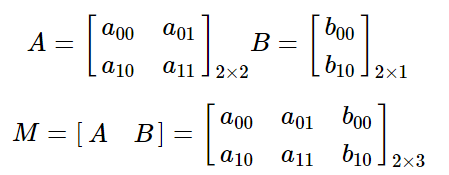

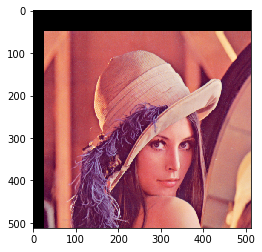

In [42]:
# shift down and right
M = np.float32([[1, 0, 25], 
                [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.imshow(shifted[...,::-1])
plt.show()

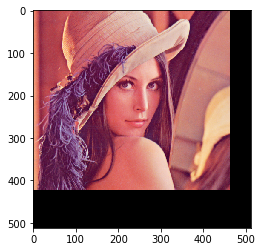

In [43]:
# shift up and left
M = np.float32([[1, 0, -50], 
                [0, 1, -90]]) 
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted[...,::-1])
plt.show()

However, manually constructing the translation matrix M and calling the cv2.warpAffine() method takes a fair amount of code. Let's define our translate() function:

In [44]:
def translate(image, x, y):
    M = np.float32([[1, 0, x], 
                    [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

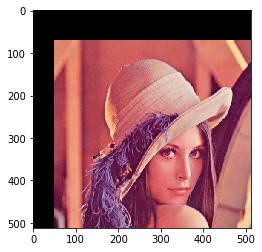

In [45]:
shifted = translate(image, 50, 70)
plt.imshow(shifted[...,::-1])
plt.show()

Let's explore how to rotate an image by a given angle.

When we rotate an image, we need to specify around which point we want to rotate. In most cases, you will want to rotate around the center of an image; however, OpenCV allows you to specify any arbitrary point you want to rotate around. Let’s just go ahead and rotate around the center of
the image. The following lines grabs the width and height of the image, then divides each by 2 to determine the center of the image. Integer division is used here, denoted as “//” to ensure we receive whole integer numbers.


In [46]:
# Grab the dimensions of the image and calculate the center
# of the image
(h, w) = image.shape[:2]
center = (w // 2, h // 2)


Just as we defined a matrix to translate an image, we also define a matrix to rotate the image. 

Instead of manually constructing the matrix using NumPy, we’ll just make a call to the cv2.getRotationMatrix2D() method.

The cv2.getRotationMatrix2D() function takes three arguments: 
* the point at which we want to rotate the image around (in this case, the center of the image). 
* the number of degrees we are going to rotate the image by.
* the last argument is the scale of the image. Here you can specify a floating point value, where 1.0 means the same dimensions of the image are used. However, if you specified a value of 2.0 the image would be doubled in size. Similarly, a value of 0.5 halves the size of the image.


In [61]:
# Rotate our image by 45 degrees
M = cv2.getRotationMatrix2D(center, 45, 1.0)

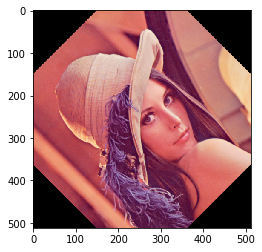

In [52]:
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated[...,::-1])
plt.show()

In [62]:
# Let's inspect the M values:
print(M)
print(np.sin(np.deg2rad(45)))
print(np.cos(np.deg2rad(45)))

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]
0.7071067811865476
0.7071067811865476


Why aren't the translation components (i.e., last column) zero?
Let's build our rotation matrix manually.

In [63]:
M[:,-1] = [0,0]
#theta = 45
#M = np.float32([[np.cos(np.deg2rad(theta)), -np.sin(np.deg2rad(theta)), 0], 
#                [np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0]])
print(M)


[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


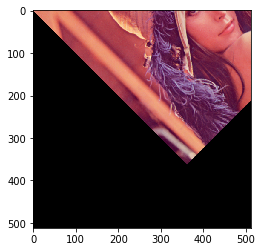

In [64]:
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated[...,::-1])
plt.show()

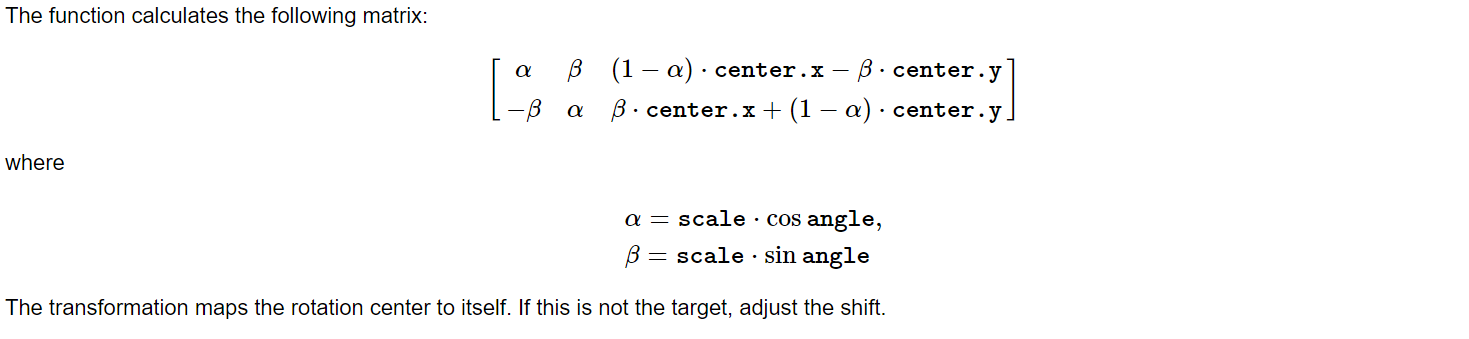

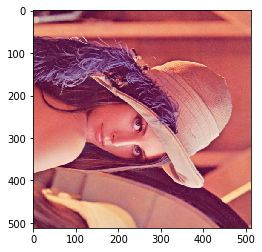

In [38]:
# Rotate our image by -90 degrees
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated[...,::-1])
plt.show()

Let’s define our own custom rotate method.

Our rotate method takes four arguments. The first is our image. The second is the angle q in which we want to rotate the image. We provide two optional keyword arguments, center and scale. The center parameter is the point which we wish to rotate our image around. If a value of None is provided, the method automatically determines the center of the image. Finally, the scale parameter is used to handle if the size of the image should be changed during the rotation. The scale parameter has a default value of 1.0, implying that no resizing should be done.

In [39]:
def rotate(image, angle, center = None, scale = 1.0):
    # Grab the dimensions of the image
    (h, w) = image.shape[:2]

    # If the center is None, initialize it as the center of
    # the image
    if center is None:
        center = (w // 2, h // 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    # Return the rotated image
    return rotated

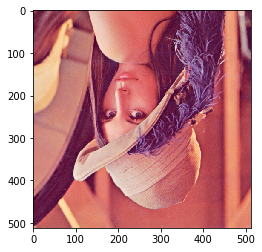

In [41]:
rotated = rotate(image, 180)
plt.imshow(rotated[...,::-1])
plt.show()

Now, we are going to explore how to resize an image.

When resizing an image, we need to keep in mind the aspect ratio of the image. The aspect ratio is the proportional relationship of the width and the height of the image.
If we aren’t mindful of the aspect ratio, our resizing will return results that don’t look correct.

In [51]:
# r: ratio of the width resizing
r = 150.0 / image.shape[1]
# dim = (new w, new h)
dim = (150, int(image.shape[0] * r))

# Perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

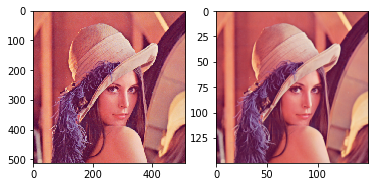

In [52]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image[...,::-1])
plt.subplot(1,2,2)
plt.imshow(resized[...,::-1])
plt.show()

In this code, we define our new image width to be 150 pixels. In order to compute the ratio of the new height to the old height, we simply define our ratio r to be the new width (150 pixels) divided by the old width.

From the OpenCV documentation about cv2.resize():

<b>Parameters:</b>
* dsize	output image size; if it equals zero, it is computed as: dsize = Size(round(fx*src.cols), round(fy*src.rows))

<i>Either dsize or both fx and fy must be non-zero.</i>

* fx	scale factor along the horizontal axis; when it equals 0, it is computed as (double)dsize.width/src.cols

* fy	scale factor along the vertical axis; when it equals 0, it is computed as (double)dsize.height/src.rows

In [6]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

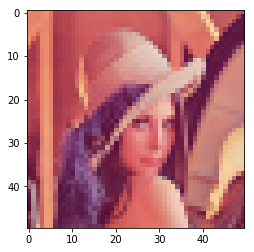

In [8]:
resized = resize(image, 50)
plt.imshow(resized[...,::-1])
plt.show()

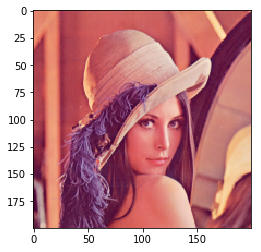

In [9]:
resized = resize(image, 200)
plt.imshow(resized[...,::-1])
plt.show()

Flipping and cropping.

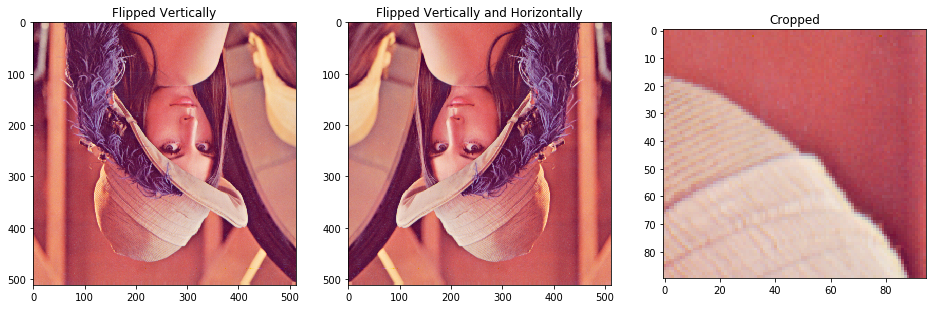

In [11]:
flipped_v = cv2.flip(image,0)
flipped_vh = cv2.flip(image,-1)
cropped = image[30:120 , 240:335]

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(flipped_v[...,::-1])
plt.title('Flipped Vertically')
plt.subplot(1,3,2)
plt.title('Flipped Vertically and Horizontally')
plt.imshow(flipped_vh[...,::-1])
plt.subplot(1,3,3)
plt.title('Cropped')
plt.imshow(cropped[...,::-1])
plt.show()

# <font style="color:black">Annotating Images</font>

We will learn how to peform the following annotations to images.

* Draw lines 
* Draw circles
* Draw rectangles
* Add text

These are useful when you want to annotate your results for presentations or show a demo of your application. Annotations can also be useful during development and debugging.

In [20]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

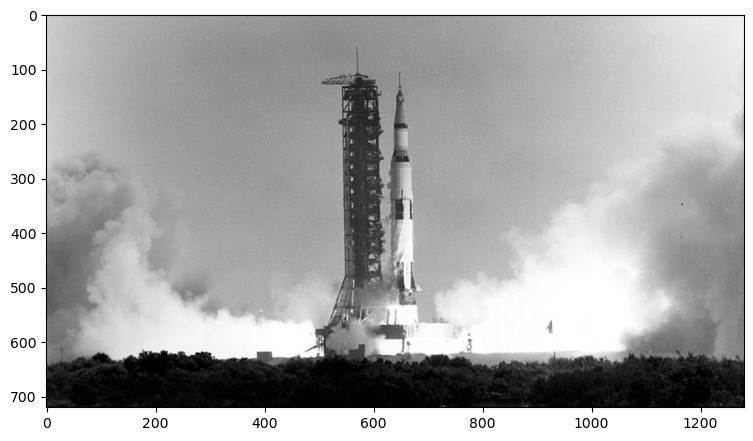

In [21]:
# Read in an image
image = cv2.imread("Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(image[:,:,::-1])

## <font style="color:black">Drawing a Line</font>


Let's start off by drawing a line on an image. We will use cv2.line function for this.

### <font style="color:rgb(8,133,37)">Function Syntx</font>
``` python
    img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:   Image on which we will draw a line
2. `pt1`:   First point(x,y location) of the line segment
3. `pt2`:   Second point of the line segment
4. `color`: Color of the line which will be drawn
    
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.
2. `lineType`:  Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.
    
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`line:`**https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2

Let's see an example of this.

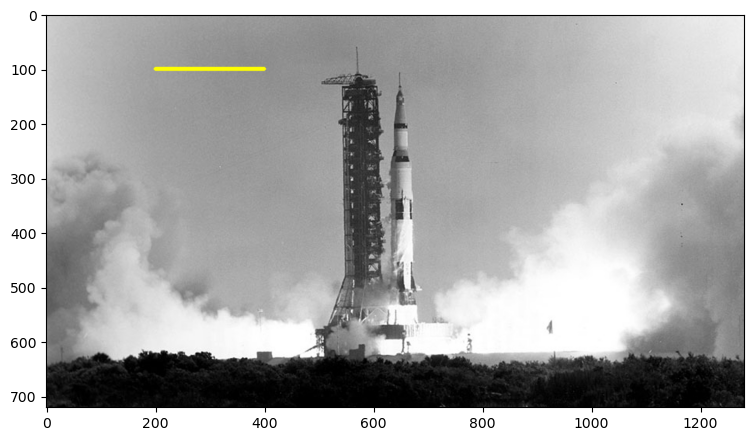

In [22]:
imageLine = image.copy()

# The line starts from (200,100) and ends at (400,100)
# The color of the line is YELLOW (Recall that OpenCV uses BGR format)
# Thickness of line is 5px
# Linetype is cv2.LINE_AA

cv2.line(imageLine, (200, 100), (400, 100), (0, 255, 255), thickness=5, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageLine[:,:,::-1])

## <font style="color:black">Drawing a Circle</font>


Let's start off by drawing a circle on an image. We will use cv2.circle function for this.

### <font style="color:rgb(8,133,37)">Functional syntx</font>
``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line
2. `center`: Center of the circle
3. `radius`: Radius of the circle
4. `color`:  Color of the circle which will be drawn
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive). 
If a negative value is supplied for this argument, it will result in a filled circle.
2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in **cv2.line**
    
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>
    
**`circle:`** https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670

Let's see an example of this.

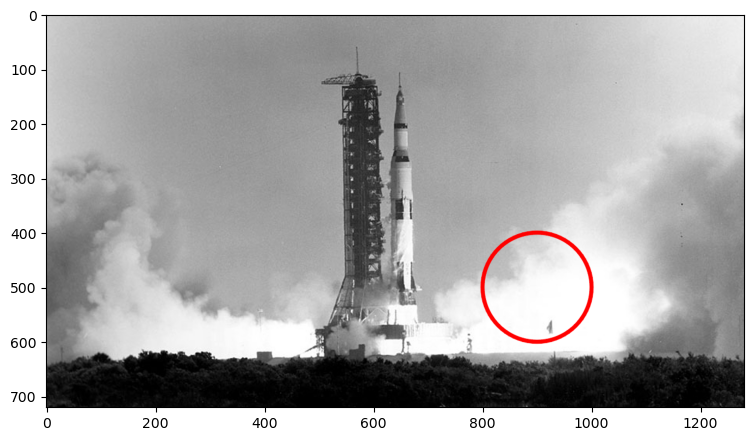

In [23]:
# Draw a circle
imageCircle = image.copy()

cv2.circle(imageCircle, (900,500), 100, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageCircle[:,:,::-1])

## <font style="color:black">Drawing a Rectangle</font>


We will use **cv2.rectangle** function to draw a rectangle on an image. The function syntax is as follows.

### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.
2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.
3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right**              vertex here.
4. `color`: Rectangle color
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive). 
    If a negative value is supplied for this argument, it will result in a filled rectangle.
2. `lineType`: Type of the circle boundary. This is exact same as lineType argument in 
    **cv2.line**
    
### <font style="color:rgb(8,133,37)">OpenCV Documentation Links</font>

**`rectangle:`**https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9
    
Let's see an example of this.

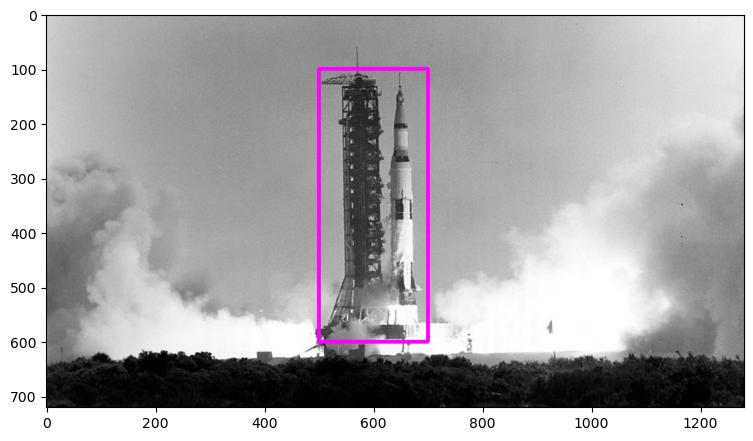

In [24]:
# Draw a rectangle (thickness is a positive integer)
imageRectangle = image.copy()

cv2.rectangle(imageRectangle, (500, 100), (700,600), (255, 0, 255), thickness=5, lineType=cv2.LINE_8);

# Display the image
plt.imshow(imageRectangle[:,:,::-1])

## <font style="color:black">Adding Text</font>


Finally, let's see how we can write some text on an image using **cv2.putText** function.

### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.
2. `text`: Text string to be written.
3. `org`: Bottom-left corner of the text string in the image.
4. `fontFace`: Font type
5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.
6. `color`: Font color
 
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.
2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`putText:`**https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576
    
Let's see an example of this.

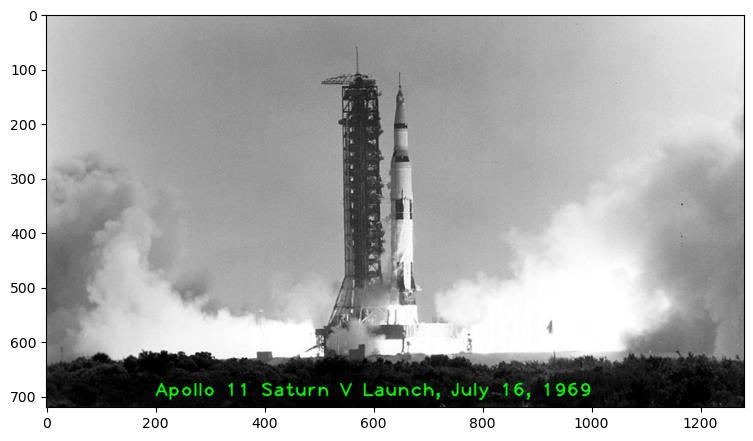

In [25]:
imageText = image.copy()
text = "Apollo 11 Saturn V Launch, July 16, 1969"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageText, text, (200, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the image
plt.imshow(imageText[:,:,::-1])

# References

[1] OpenCV doc. http://docs.opencv.org/2.4/index.html (OpenCV 2.4) https://docs.opencv.org/4.0.0/ (OpenCV 4.0.0)

[2] Reading and writing images and video with OpenCV.<br>http://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html

[3] Displaying images with Python and OpenCV.<br>http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html

[4] OpenCV Color Conversion.<br>http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cv2.cvtColor